In [ ]:
#Importing essential libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
plt.style.use("ggplot")

In [ ]:
#Uploading the dataset to Google Colab.
upload = files.upload()

Saving customer_churn_data.csv to customer_churn_data.csv


In [ ]:
df_raw = pd.read_csv("customer_churn_data.csv")

In [ ]:
df_raw.head(20)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
6,7,60,Male,14,80.32,One-Year,NaN,1124.48,No,Yes
7,8,52,Female,6,58.90,One-Year,NaN,353.40,No,Yes
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
9,10,50,Female,10,61.55,Month-to-Month,Fiber Optic,615.50,Yes,Yes


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [ ]:
df_raw.shape

(1000, 10)

In [ ]:
df = df_raw.copy()

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
MonthlyCharges,0
ContractType,0
InternetService,297
TotalCharges,0
TechSupport,0
Churn,0


In [ ]:
#Looking at how Contract Type, Internet Service, and Churn relate with each other.
df[["ContractType","InternetService", "Churn"]].value_counts(normalize= True)

ContractType    InternetService  Churn
Month-to-Month  Fiber Optic      Yes      0.283073
                DSL              Yes      0.219061
One-Year        Fiber Optic      Yes      0.106686
                DSL              Yes      0.075391
Two-Year        DSL              Yes      0.075391
                Fiber Optic      Yes      0.073969
One-Year        Fiber Optic      No       0.059744
                DSL              No       0.041252
Two-Year        Fiber Optic      No       0.038407
                DSL              No       0.027027
Name: proportion, dtype: float64

In [ ]:
#Checking if there are any missing values in the InternetService column.
df[["InternetService"]].isna().sum().value_counts(normalize = True)

,proportion
297,1.0


In [ ]:
#Filling missing InternetService values with "No Internet".
df["InternetService"].fillna("No Internet", inplace = True)

/tmp/ipython-input-3034685581.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["InternetService"].fillna("No Internet", inplace = True)


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
MonthlyCharges,0
ContractType,0
InternetService,0
TotalCharges,0
TechSupport,0
Churn,0


In [ ]:
#Checking for duplicated values
df[df.duplicated(subset = df.columns, keep = False)]

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn


In [ ]:
#Looking for rows where Tenure is equal to 0.
df.loc[df["Tenure"] == 0]

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes
31,32,63,Female,0,76.62,Two-Year,DSL,0.0,Yes,Yes
53,54,51,Male,0,51.74,One-Year,Fiber Optic,0.0,No,Yes
64,65,53,Female,0,101.66,Month-to-Month,Fiber Optic,0.0,Yes,Yes
69,70,38,Male,0,87.27,One-Year,No Internet,0.0,No,Yes
101,102,40,Male,0,106.04,Month-to-Month,Fiber Optic,0.0,Yes,Yes
117,118,33,Male,0,62.44,One-Year,DSL,0.0,Yes,Yes
121,122,35,Male,0,88.89,Month-to-Month,Fiber Optic,0.0,No,Yes
122,123,59,Male,0,50.88,Month-to-Month,Fiber Optic,0.0,No,Yes
125,126,66,Female,0,86.14,Two-Year,Fiber Optic,0.0,Yes,Yes


In [ ]:
#Removing all rows where Tenure is equal to 0.
df = df.loc[df["Tenure"] > 0]

/tmp/ipython-input-3732915602.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df["InternetService"],


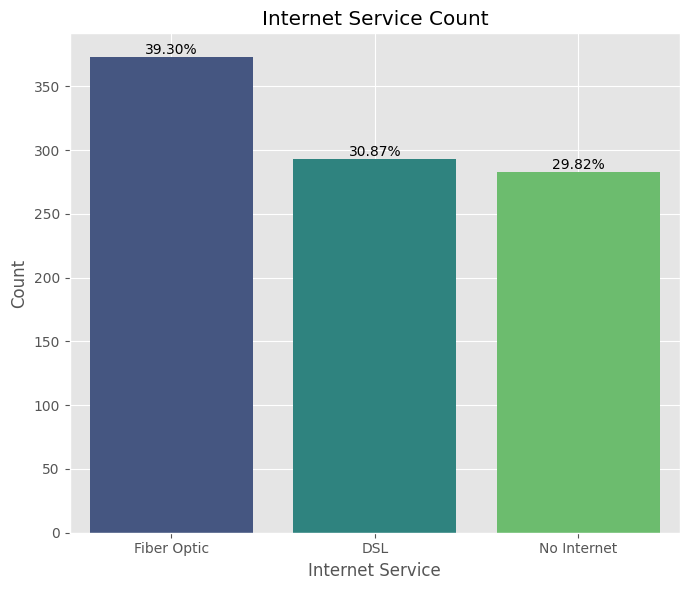

In [ ]:
#Visualizing the number of customers by Internet Service type.
plt.figure(figsize = (7,6))

ax = sns.countplot(x = df["InternetService"],
              palette = "viridis")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/len(df):.2%}',
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom')
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.title("Internet Service Count")
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-801509895.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


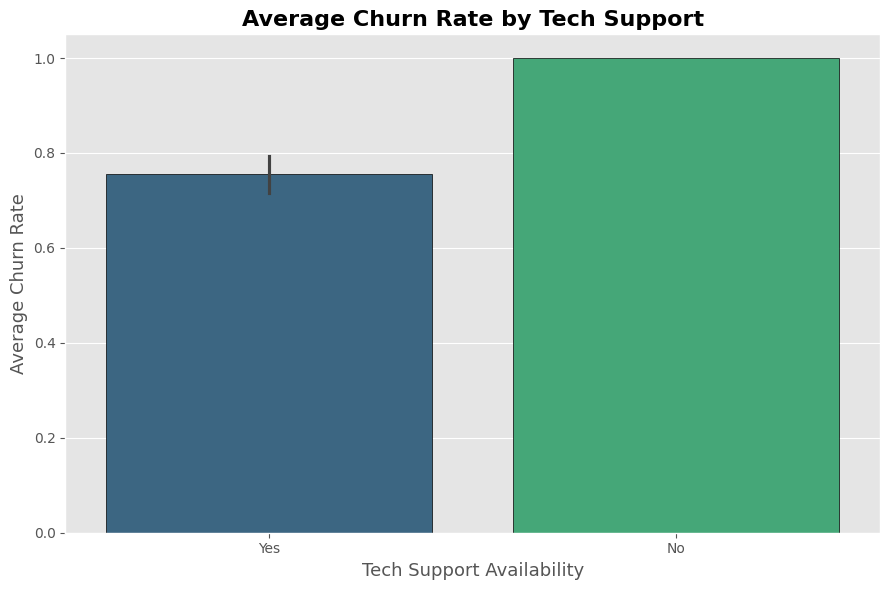

In [ ]:
#Visualizing the average churn rate based on Tech Support availability.
plt.figure(figsize=(9,6))
df["Churn Numeric"] = df["Churn"].map({"Yes": 1, "No": 0})

sns.barplot(
    data=df,
    x="TechSupport",
    y="Churn Numeric",
    palette="viridis",
    edgecolor="black")

plt.title("Average Churn Rate by Tech Support", fontsize=16, fontweight='bold')
plt.xlabel("Tech Support Availability", fontsize=13)
plt.ylabel("Average Churn Rate", fontsize=13)

plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges,Churn Numeric
count,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,502.596417,44.654373,19.992624,74.226628,1479.835680,0.876712
std,289.479069,9.751157,18.860664,25.718576,1578.452578,0.328940
min,1.000000,12.000000,1.000000,30.000000,30.060000,0.000000
25%,252.000000,38.000000,6.000000,51.910000,408.400000,1.000000
50%,503.000000,45.000000,14.000000,73.910000,941.080000,1.000000
75%,753.000000,51.000000,28.000000,95.720000,2005.740000,1.000000
max,1000.000000,83.000000,122.000000,119.960000,12416.250000,1.000000


In [ ]:
numeric_col_data = df.select_dtypes(include = ["number"])

In [ ]:
numeric_col_data

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges,Churn Numeric
0,1,49,4,88.35,353.40,1
2,3,51,2,63.79,127.58,1
3,4,60,8,102.34,818.72,1
4,5,42,32,69.01,2208.32,1
5,6,42,16,119.75,1916.00,1
...,...,...,...,...,...,...
995,996,42,41,37.14,1522.74,1
996,997,62,9,80.93,728.37,1
997,998,51,15,111.72,1675.80,1
998,999,39,68,65.67,4465.56,1


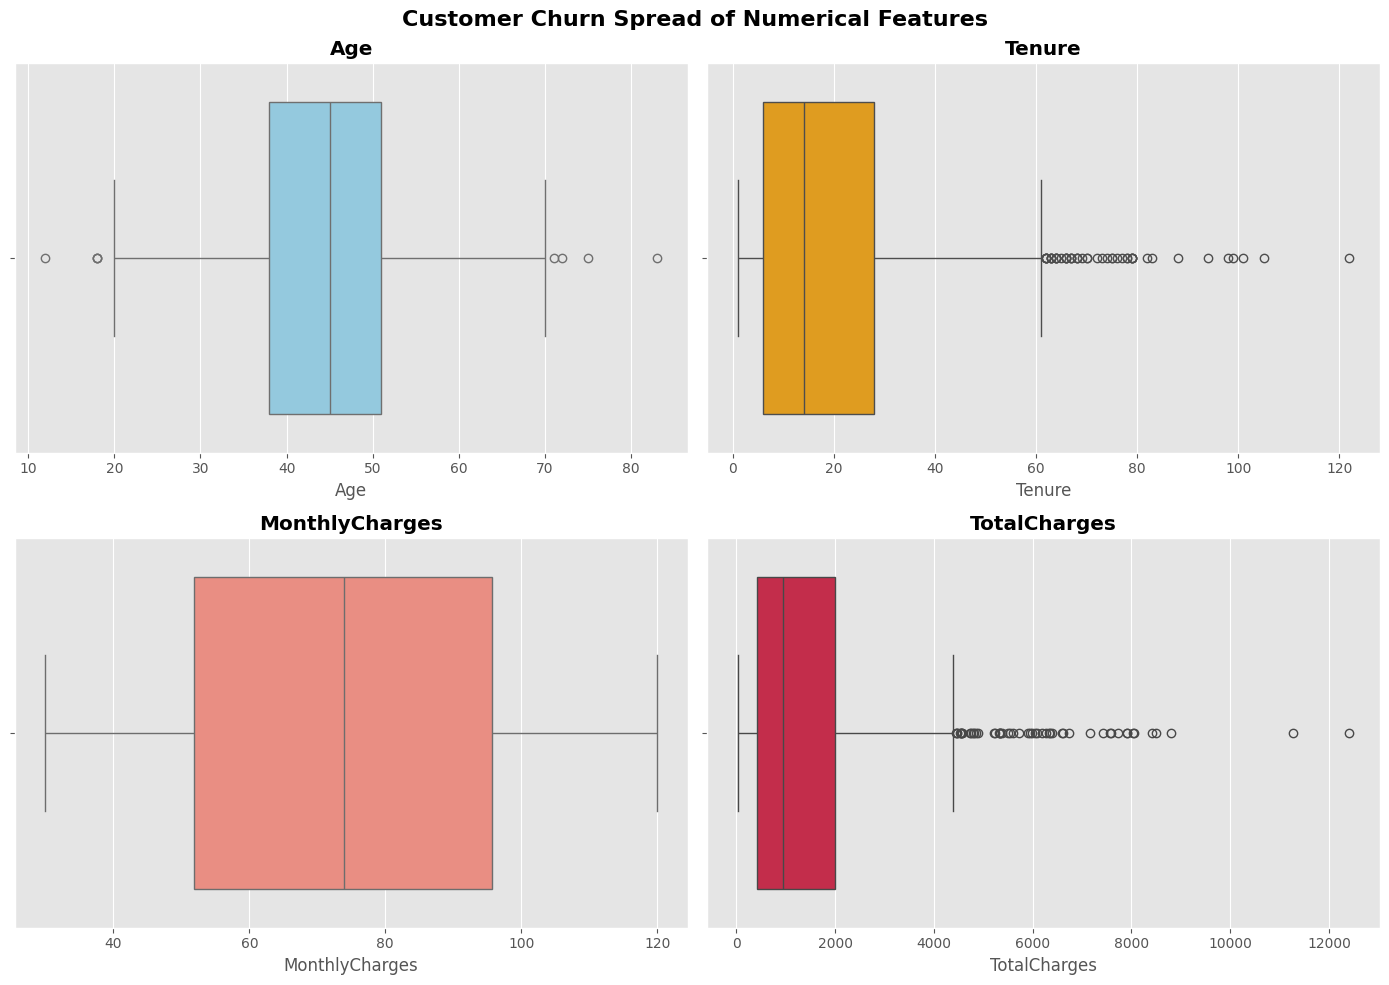

In [ ]:
#Visualizing the distribution of numeric features using boxplots.
fig, axes = plt.subplots(2,2, figsize = (14,10))

sns.boxplot(data = df,
            x = "Age",
            ax = axes[0,0],
            color = "skyblue")
axes[0,0].set_title("Age", fontweight="bold")

sns.boxplot(data = df,
            x = "Tenure",
            ax = axes[0,1],
            color = "orange")
axes[0,1].set_title("Tenure", fontweight="bold")

sns.boxplot(data = df,
            x = "MonthlyCharges",
            ax = axes[1,0],
            color = "salmon")
axes[1,0].set_title("MonthlyCharges", fontweight="bold")

sns.boxplot(data = df,
            x = "TotalCharges",
            ax = axes[1,1],
            color = "crimson")

axes[1,1].set_title("TotalCharges", fontweight="bold")

plt.suptitle("Customer Churn Spread of Numerical Features", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

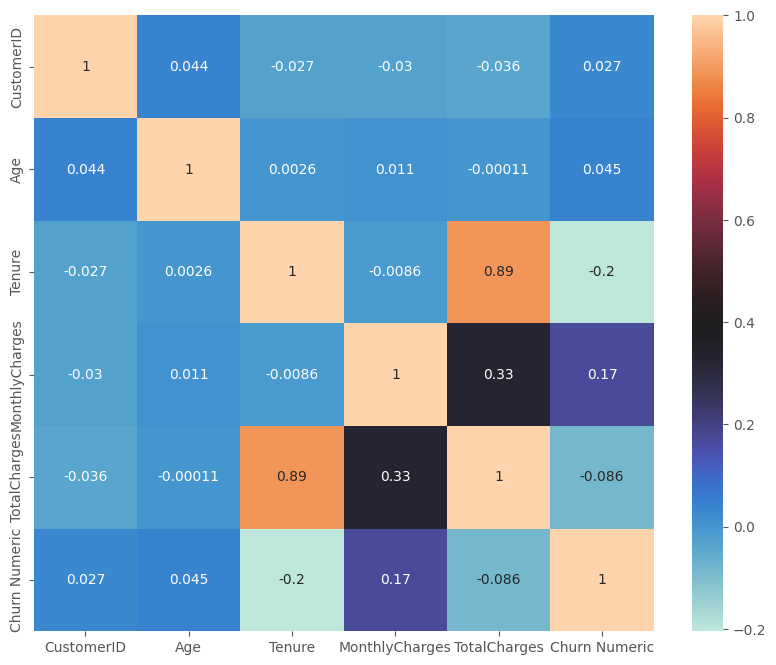

In [ ]:
#Creating an heatmap and visualizing the correlation between numeric features.

plt.figure(figsize = (10,8))
sns.heatmap(numeric_col_data.corr(),
            annot = True,
            cmap = "icefire")
plt.show()

/tmp/ipython-input-1353399784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df,


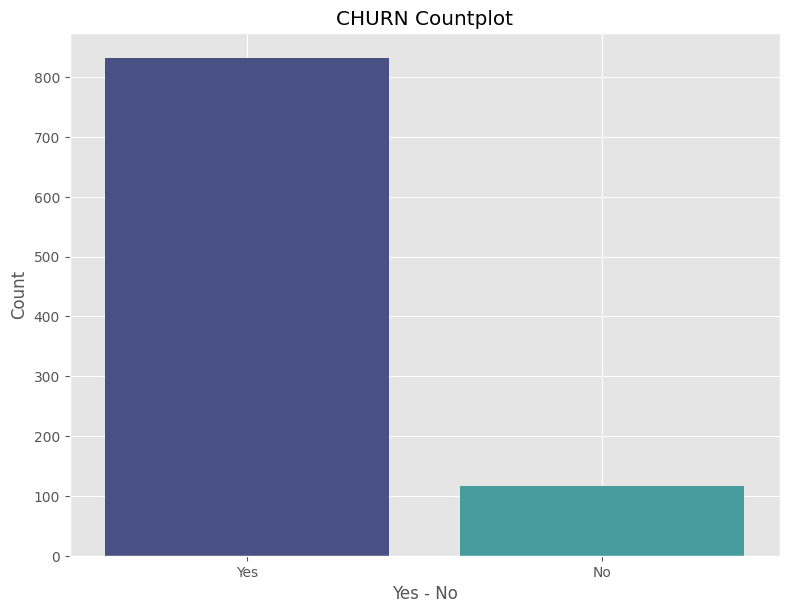

In [ ]:
#Vsualizing the distribution of churned vs. non-churned customers.
plt.figure(figsize = (8,6))

sns.countplot(data = df,
              x = "Churn",
              palette = "mako")

plt.tight_layout()
plt.grid(True)
plt.title("CHURN Countplot")
plt.ylabel("Count")
plt.xlabel("Yes - No")
plt.show()

In [ ]:
cmc = df.groupby("Churn")["MonthlyCharges"].mean()
cmc

,MonthlyCharges
Churn,
No,62.546410
Yes,75.869159


In [ ]:
cgmc = df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()
cgmc

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.686779
       Male      77.222191
Name: MonthlyCharges, dtype: float64

In [ ]:
ct = df.groupby("Churn")["Tenure"].mean()
ct

,Tenure
Churn,
No,30.264957
Yes,18.548077


In [ ]:
ca = df.groupby("Churn")["Age"].mean()
ca

,Age
Churn,
No,43.487179
Yes,44.818510


/tmp/ipython-input-1302011495.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = cmc.reset_index(),
/tmp/ipython-input-1302011495.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = ct.reset_index(),
/tmp/ipython-input-1302011495.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = ca.reset_index(),


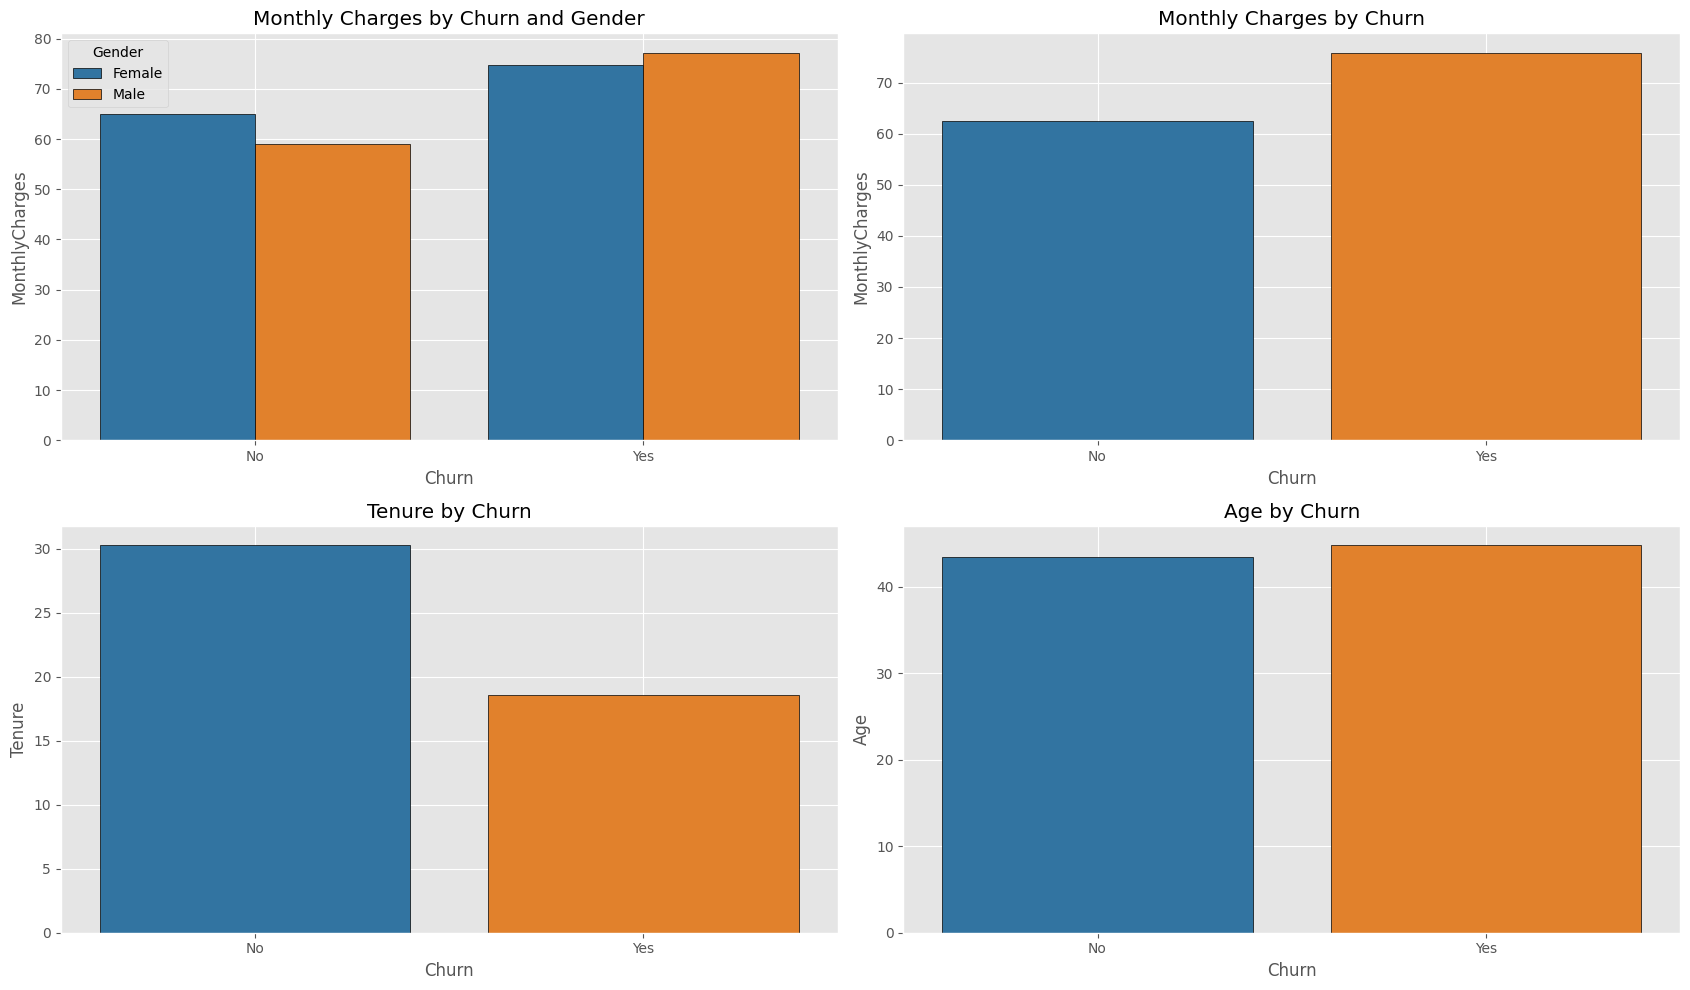

In [ ]:
#Comparing key numeric features (Monthly Charges, Tenure, Age) with Churn and visualizing gender differences for Monthly Charges
#using multiple bar plots to spot patterns and differences between churned and non-churned customers.

fig, axes = plt.subplots(2,2, figsize = (17,10))

sns.barplot(data = cgmc.reset_index(),
            x = "Churn",
            y = "MonthlyCharges",
            hue = "Gender",
            ax = axes[0,0],
            palette = "tab10",
            edgecolor = "black")
axes[0,0].grid(True)
axes[0,0].set_title("Monthly Charges by Churn and Gender")

sns.barplot(data = cmc.reset_index(),
            x = "Churn",
            y = "MonthlyCharges",
            ax = axes[0,1],
            palette = "tab10",
            edgecolor = "black")
axes[0,1].grid(True)
axes[0,1].set_title("Monthly Charges by Churn")

sns.barplot(data = ct.reset_index(),
              x = "Churn",
              y = "Tenure",
              ax = axes[1,0],
              palette = "tab10",
              edgecolor = "black")
axes[1,0].grid(True)
axes[1,0].set_title("Tenure by Churn")

sns.barplot(data = ca.reset_index(),
              x = "Churn",
              y = "Age",
              ax = axes[1,1],
              palette = "tab10",
              edgecolor = "black")
axes[1,1].grid(True)
axes[1,1].set_title("Age by Churn")

plt.tight_layout()
plt.show()


In [ ]:
contract_type_mc =  df.groupby("ContractType")["MonthlyCharges"].mean()

/tmp/ipython-input-3581289231.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = contract_type_mc.index,


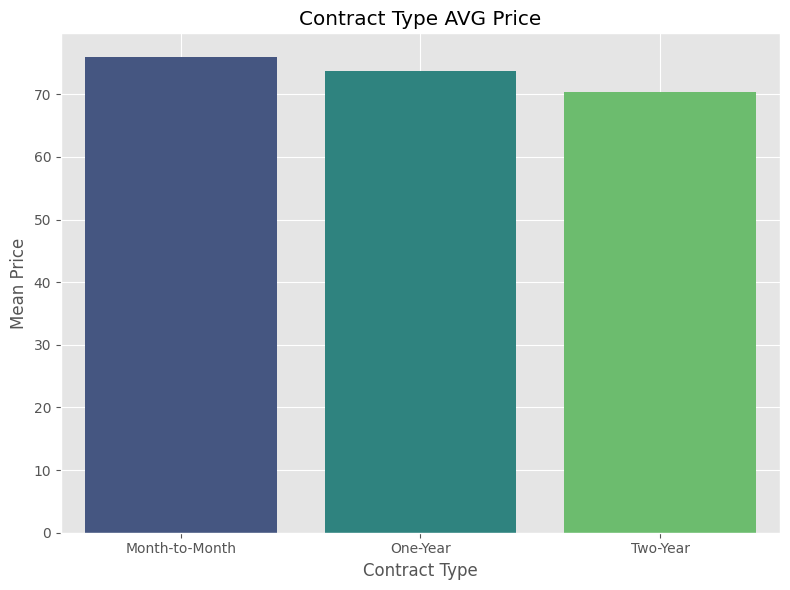

In [ ]:
#Showing the average monthly charges for each contract type using a bar plot to see how contract plans affect customer pricing.
plt.figure(figsize = (8,6))

sns.barplot(x = contract_type_mc.index,
            y = contract_type_mc.values,
            palette = 'viridis')

plt.grid(True)
plt.xlabel("Contract Type")
plt.ylabel("Mean Price")
plt.title("Contract Type AVG Price")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3837908396.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df,


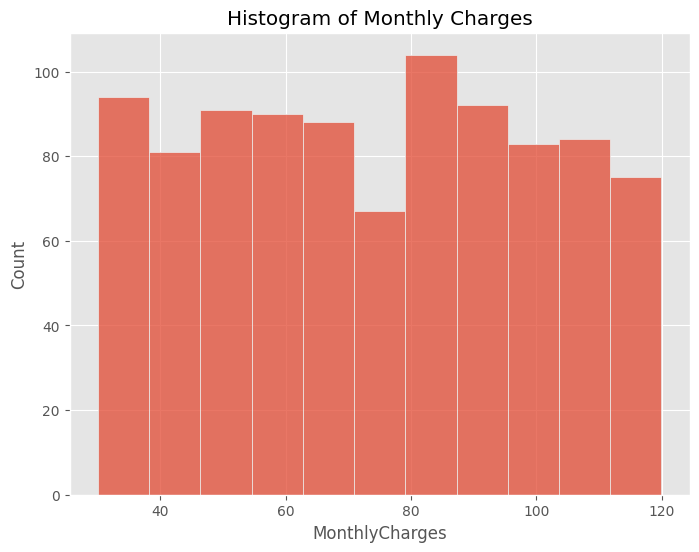

In [ ]:
#Visualizing the distribution of Monthly Charges to see how customer prices are spread across different values.
plt.figure(figsize = (8,6))

sns.histplot(data = df,
             x = "MonthlyCharges",
             palette = "viridis")
plt.title("Histogram of Monthly Charges")
plt.show()

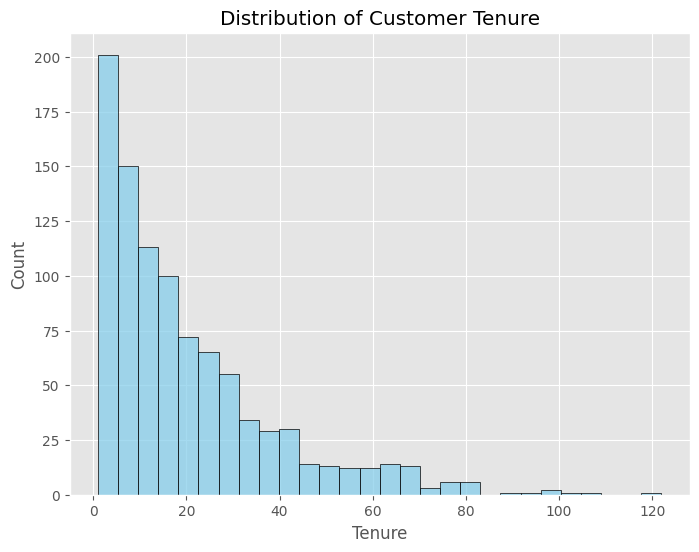

In [ ]:
#Visualizing the distribution of customer Tenure to see how long customers have been with the company.

plt.figure(figsize = (8,6))

sns.histplot(data = df,
             x = df["Tenure"],
             color="skyblue",
             edgecolor="black")
plt.title("Distribution of Customer Tenure")
plt.show()

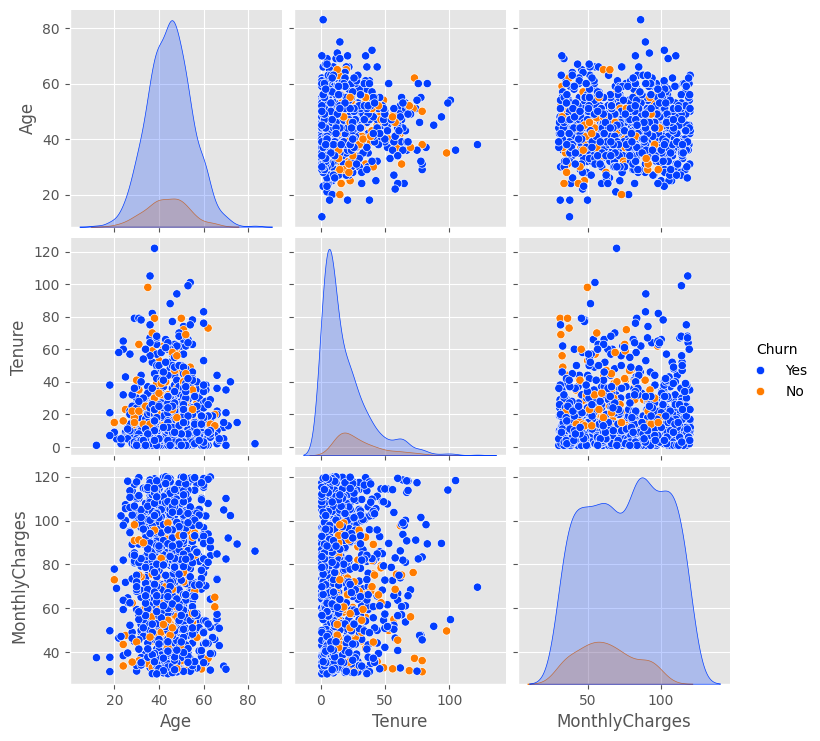

In [ ]:
#Creating and visualizing pairplots to comprehend data deeply.
sns.pairplot(df[["Age", "Tenure", "MonthlyCharges", "Churn"]],
             hue="Churn",
             palette = "bright")
plt.show()

In [ ]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn', 'Churn Numeric'],
      dtype='object')

In [ ]:
#Converting categorical columns to numerical data:
#Male/Female to 0/1 and No/Yes Churn to 0/1 for modeling purposes.
df["Gender Features"] = df["Gender"].map({"Male":0, "Female":1})
df["Churn Features"] = df["Churn"].map({"No":0, "Yes":1})

In [ ]:
# Defining features x and target y for modeling.
y = df["Churn Features"]
x = df[["Age","Gender Features","Tenure","MonthlyCharges"]]

In [ ]:
#Splitting the data into training and testing sets 80% train, 20% test for model evaluation.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
#Importing standardscaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
#Scaling numeric features using StandardScaler so all feature values are on a similar scale.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 1.56374358, -1.08100482,  0.98684714, -0.98016844],
       [-0.08987032, -1.08100482, -0.02167973, -1.21688929],
       [-1.53678249,  0.92506525,  0.56220425, -1.56496239],
       ...,
       [ 0.73693663, -1.08100482,  1.0399275 ,  1.66425268],
       [ 0.01348055,  0.92506525,  1.30532931, -0.51295623],
       [ 0.22018229,  0.92506525,  0.13756136,  0.9100943 ]])

In [ ]:
X_test

array([[ 5.30234893e-01,  9.25065252e-01,  9.86847143e-01,
         1.69890425e+00],
       [-6.06624666e-01,  9.25065252e-01, -8.70965510e-01,
        -5.39820928e-01],
       [-1.84683509e+00,  9.25065252e-01,  3.14006355e-02,
        -4.48714547e-01],
       [ 6.33585762e-01,  9.25065252e-01,  1.09300787e+00,
         3.04275800e-01],
       [ 1.04698924e+00, -1.08100482e+00,  1.14608823e+00,
        -5.16849661e-01],
       [ 2.20182286e-01, -1.08100482e+00,  1.57073112e+00,
         2.08886640e-01],
       [-1.93221190e-01,  9.25065252e-01,  1.72997220e+00,
        -8.69594880e-01],
       [-7.09975534e-01,  9.25065252e-01,  1.90641720e-01,
         1.58404791e+00],
       [ 1.34805481e-02, -1.08100482e+00, -1.80920811e-01,
        -8.25599064e-01],
       [ 7.36936631e-01, -1.08100482e+00,  1.14608823e+00,
         2.94542212e-01],
       [-1.95018596e+00,  9.25065252e-01, -3.93242257e-01,
        -3.60722914e-01],
       [-7.09975534e-01,  9.25065252e-01,  6.68364974e-01,
      

In [ ]:
# Importing Logistic Regression and evaluation metrics,
# and defining a function to print key model performance scores (Precision, Recall, Accuracy, F1, AUC) for the test set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def model_metrics(predictions):
  print("The precision of the model is {}".format(precision_score(y_test, predictions)))
  print("The recall of the model is {}".format(recall_score(y_test, predictions)))
  print("The Accuracy Score of model is {}".format(accuracy_score(y_test,predictions)))
  print("The F1 Score of model is {}".format(f1_score(y_test, predictions)))
  print("The AUC Score of model is {}".format(roc_auc_score(y_test, predictions)))
  return None

In [ ]:
log_model = LogisticRegression()

In [ ]:
#Training the Logistic Regression model on the training data.
log_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Testing the log model.
log_model.predict([[50,0,30,90]])

array([1])

In [ ]:
#Using the trained Logistic Regression model to make predictions on the test set.
y_pred  = log_model.predict(X_test)

In [ ]:
y_test

,Churn Features
210,1
700,1
733,1
779,0
819,1
...,...
634,1
35,1
33,1
843,1


In [ ]:
#Evaluating the model by printing a detailed classification report precision, recall, f1-score and a confusion matrix for the test set.
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.04      0.08        24
           1       0.88      1.00      0.94       166

    accuracy                           0.88       190
   macro avg       0.94      0.52      0.51       190
weighted avg       0.89      0.88      0.83       190



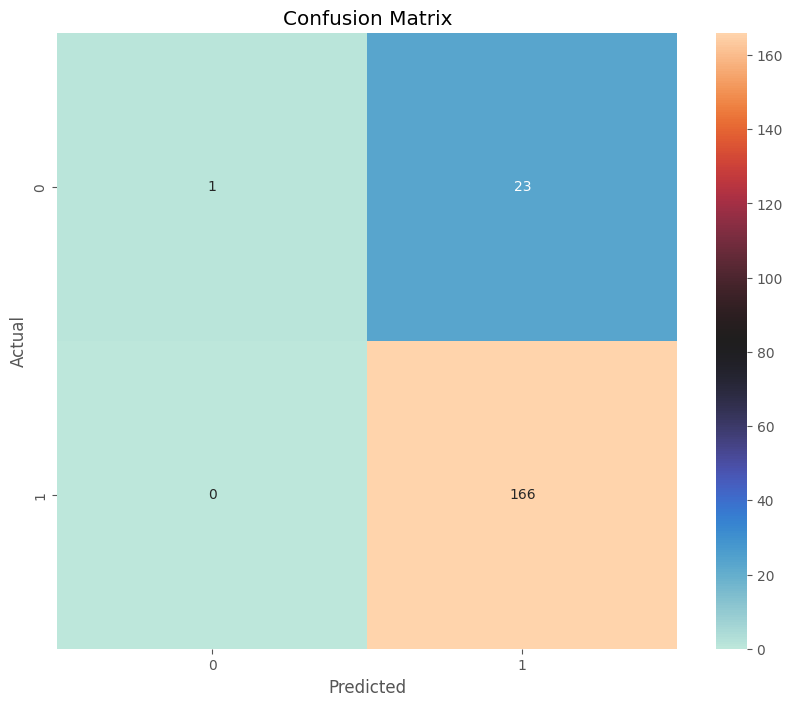

In [ ]:
#Visualizing the confusion matrix as a heatmap to see how well the model predicted churn vs. non-churn customers.
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='icefire')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


In [ ]:
#Creating a dictionary of different machine learning models to compare their performance on predicting customer churn.
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "Gradient Boosting": GradientBoostingClassifier(),
          "SVM": SVC()}



In [ ]:
#Training each model on the training data, making predictions on the test set, and printing their accuracy for a quick performance comparison.
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, preds):.2f}")

Logistic Regression Accuracy: 0.88
Random Forest Accuracy: 0.85
Gradient Boosting Accuracy: 0.84
SVM Accuracy: 0.87


In [ ]:
#Using the previously defined function to print all key performance metrics incorporating Precision, Recall, Accuracy, F1, AUC for the predictions.
model_metrics(y_pred)

The precision of the model is 0.8783068783068783
The recall of the model is 1.0
The Accuracy Score of model is 0.8789473684210526
The F1 Score of model is 0.9352112676056338
The AUC Score of model is 0.5208333333333333
